**Scatter Plot**

What are the two features that are similar ?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools

from describe import loadData, trainDataFilePath


data = loadData(trainDataFilePath())
if data is None:
    exit(1)

df = data

all_houses = df["Hogwarts House"].dropna().unique()

house_color_map = {
    'Gryffindor': "#CB5959",
    'Hufflepuff': "#E5B94C",
    'Ravenclaw':  '#6A85DF',
    'Slytherin':  "#52BE76"
}

test_df = df.copy()

Attempt to convert non numeric data to a numeric form so it can be used for the logistic regression as a feature

**Best Hand** : converted to a binary, 0 and 1

**First and Last Name** : count the characters, pretty weak idea

**Birthday** : to age, also pretty weak, presumably a Hufflepuff at 17 is still a Hufflepuff at 50

**Birth Month** : extract the month of birth from birthday, maybe something linked to the zodiac calendar and astology

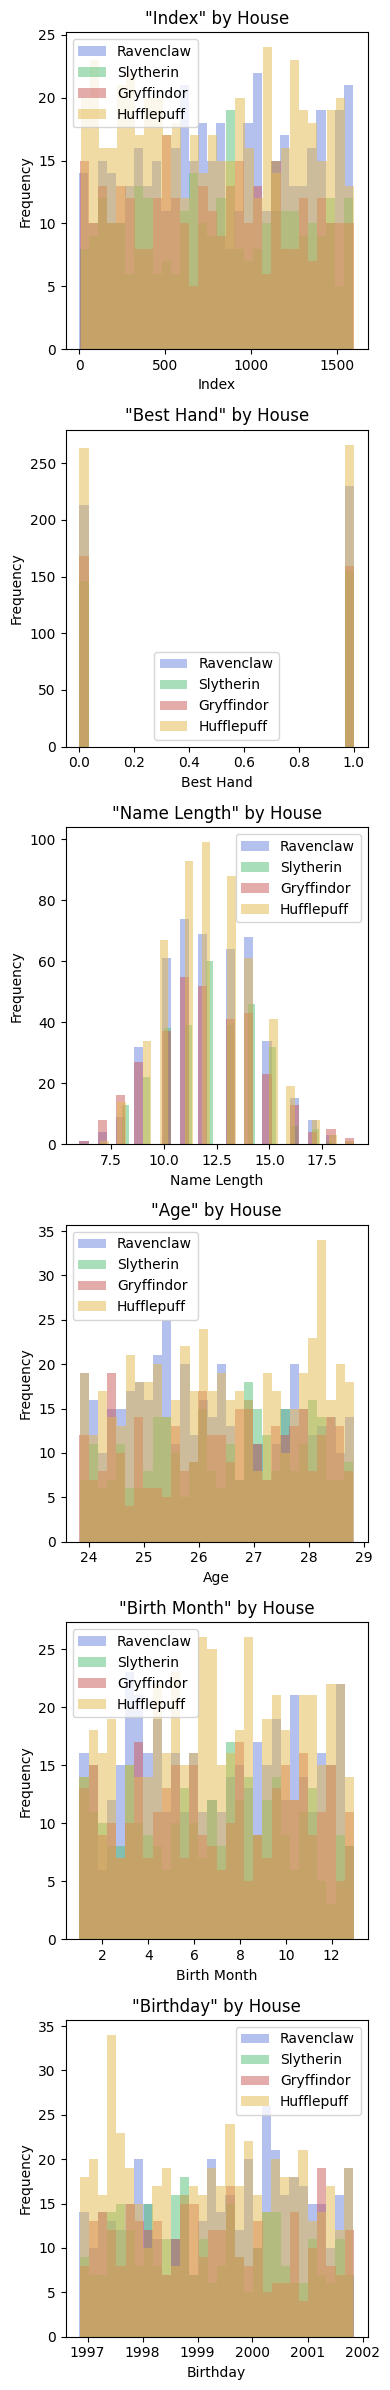

In [20]:
test_df["Best Hand"] = test_df["Best Hand"].map({"Left": 0, "Right": 1})

test_df['Name Length'] = (test_df['First Name'] + test_df['Last Name']).str.len()

ref_date = pd.to_datetime('2025-09-01')
test_df["Birthday"] = pd.to_datetime(test_df["Birthday"])

test_df['Age'] = (ref_date - test_df['Birthday']).dt.days / 365.25

test_df["Birth Month"] = test_df["Birthday"].dt.month + (test_df["Birthday"].dt.day - 1) / test_df["Birthday"].dt.days_in_month


test_colunms = ["Index", "Best Hand", "Name Length", "Age", "Birth Month", "Birthday"]

fig, axes = plt.subplots(len(test_colunms), 1, figsize=(1 * 4, len(test_colunms) * 4), squeeze=False)
axes = axes.flatten()

for i, column in enumerate(test_colunms):
    ax = axes[i]
    for house in all_houses:
        house_data = test_df[test_df["Hogwarts House"] == house][column].dropna()
        ax.hist(house_data, bins=30, alpha=0.5, label=house, color=house_color_map[house])

    ax.set_title(f'"{column}" by House')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

Looks like non of these attempts have worked, best to just leave it and only use the course scores.

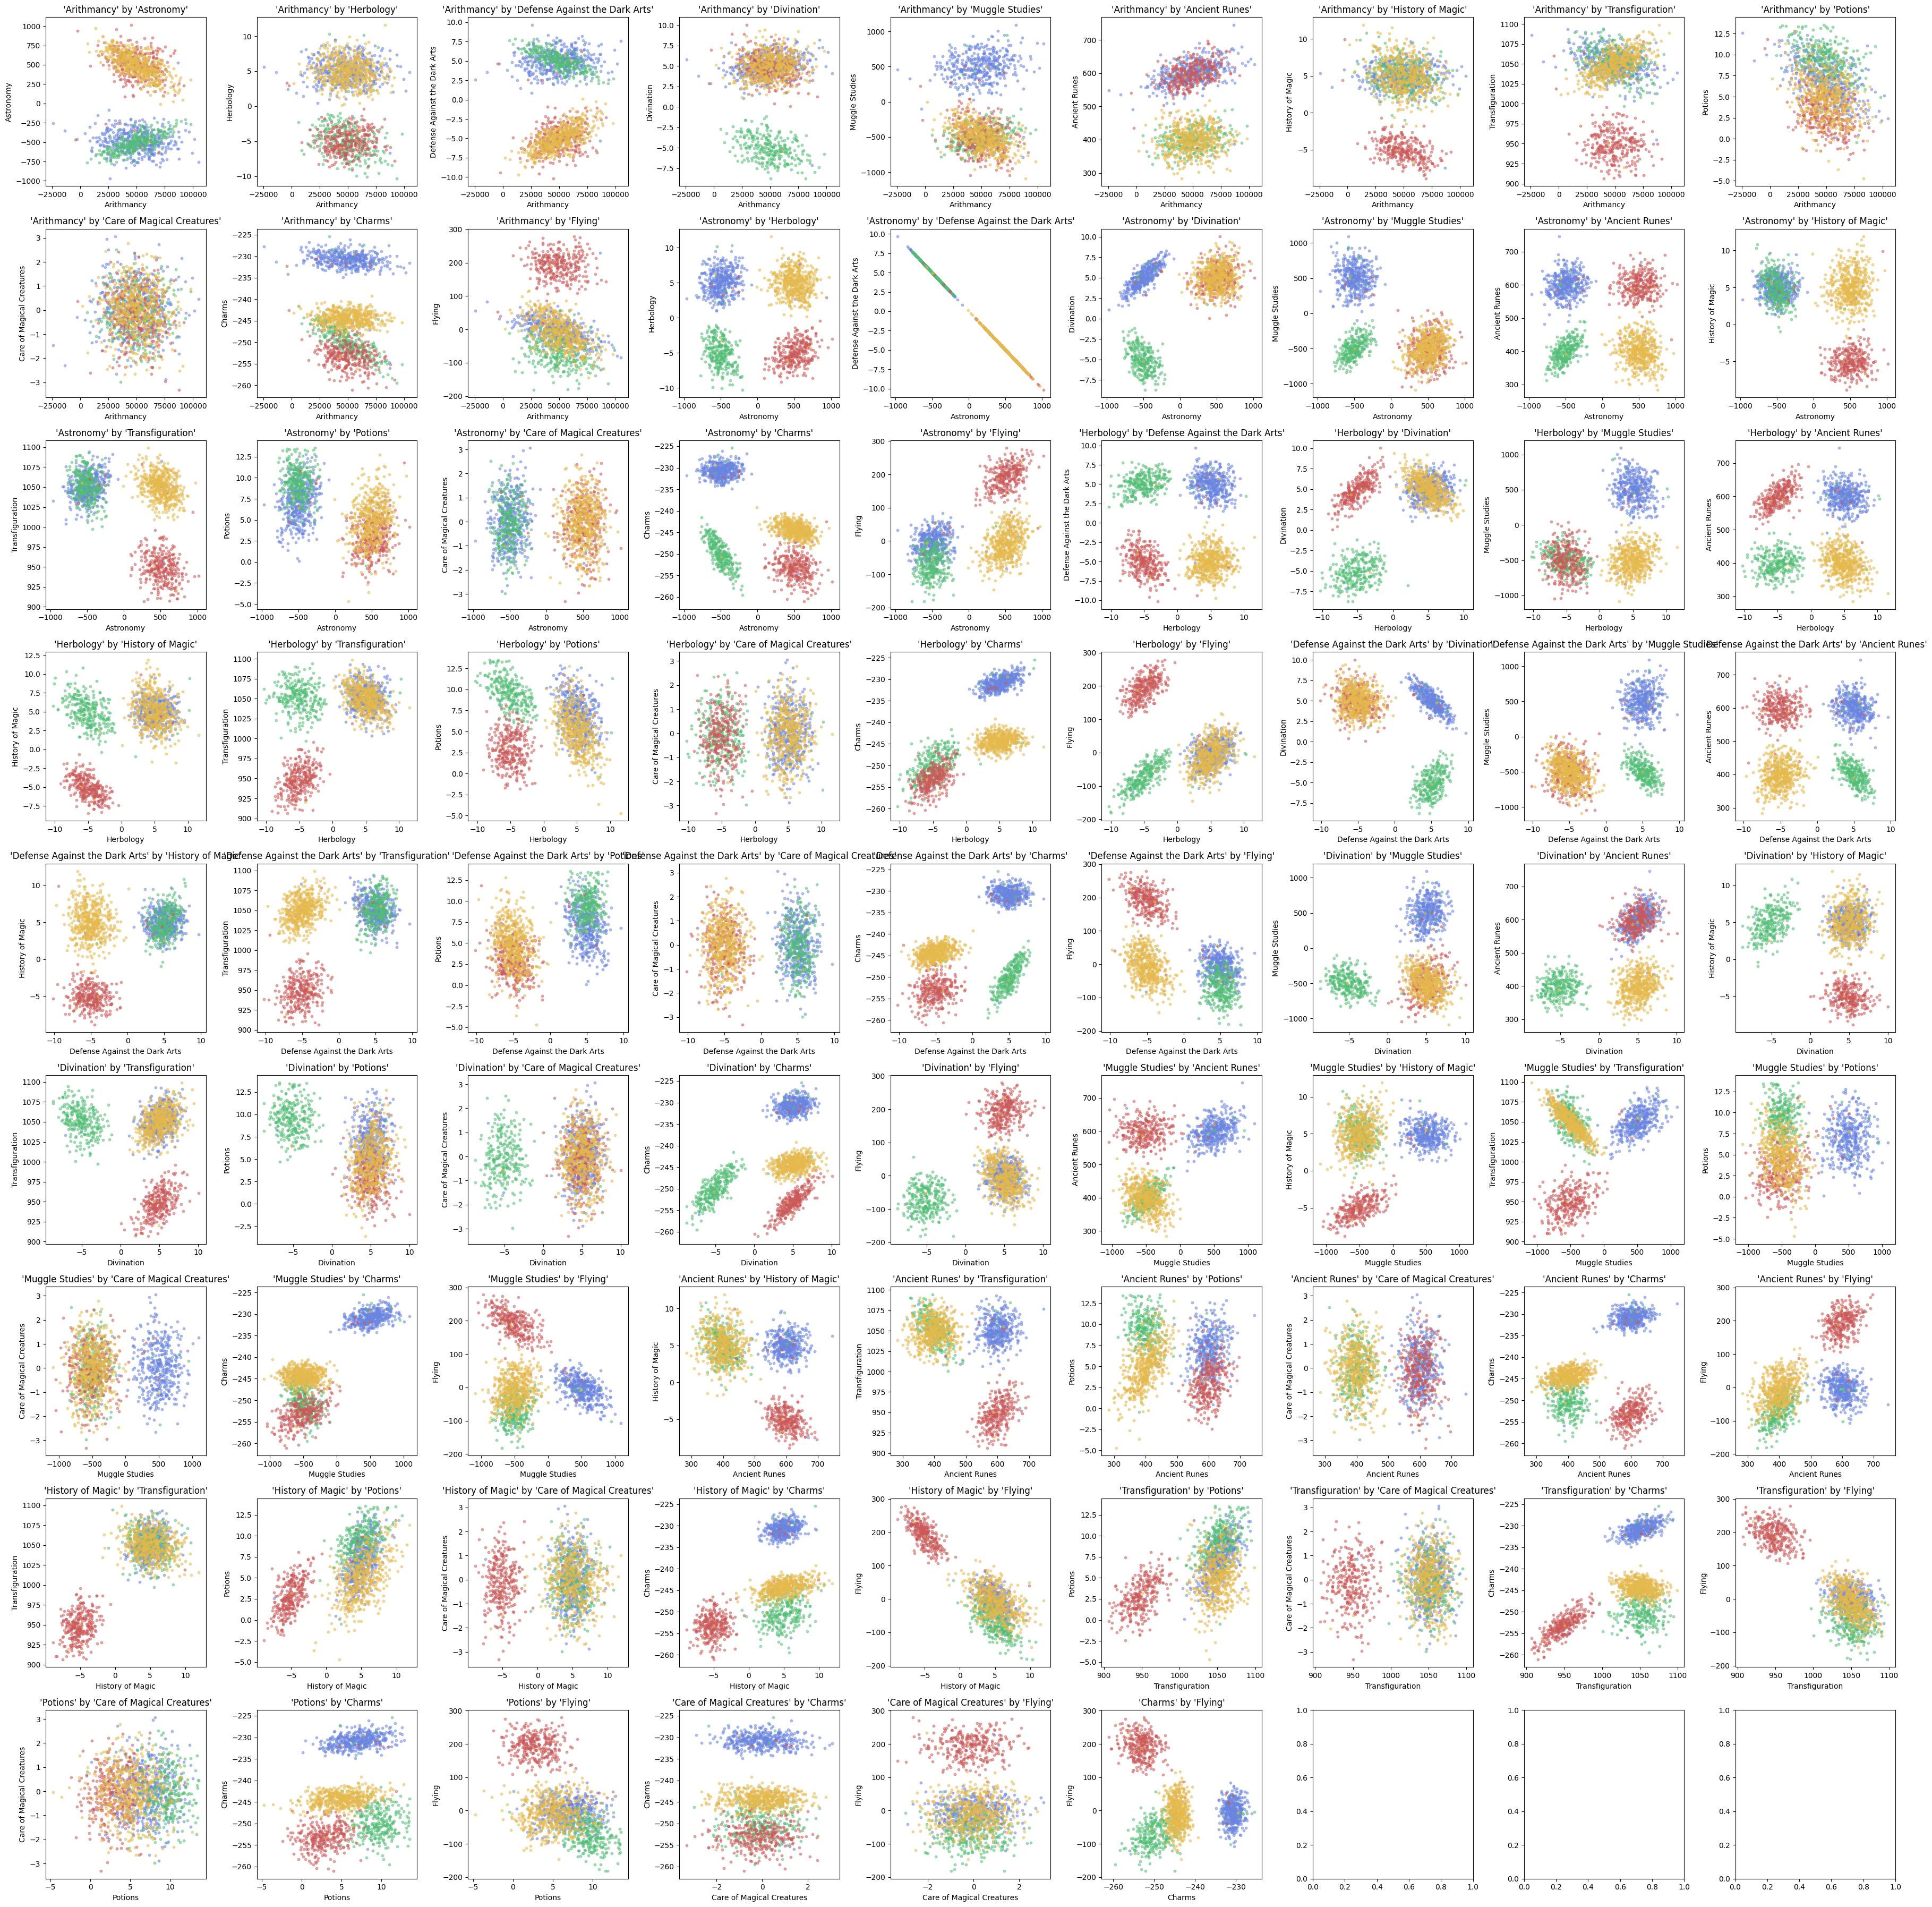

In [ ]:
df = df.drop(columns=['Index', 'index'], errors='ignore')

numeric_cols = df.select_dtypes(include='number').columns

feature_pairs = list(itertools.combinations(numeric_cols, 2))

num_plots = len(feature_pairs)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(cols, rows, figsize=(cols*4, rows*4))

axes = axes.flatten()

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    for house in all_houses:
        house_bool_maks = df["Hogwarts House"] == house
        x = df[house_bool_maks][x_feature]
        y = df[house_bool_maks][y_feature]
        ax.scatter(x, y, s=10, alpha=0.5, label=house, c=house_color_map[house])
    ax.set_title(f"'{x_feature}' by '{y_feature}'")
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

plt.tight_layout()
plt.show()

**Defence againt the Dark arts** and **Astronomy** : are the same data points, just on the different scale and one axis is flipped.

**History of Magic** and **Flying** : are verify simmilar, again one axis is fliped, and a slight deviation with Slythernin, not enough to justify keeping both.

**Flying** and **Tranfiguration** : also fairly simmilar, one axis flipped.

**History of Magic** and **Tranfiguration** if we look at the two previous observations, we'd expect these to also be simmilar, and they are but not flipped so the line slope changes.